In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#loading dataset

In [3]:
credit_card=pd.read_csv('C:/Users/Aniket Sawant/Downloads/archive (8)/creditcard.csv')

In [4]:
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Number of missing values

In [7]:
credit_card.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# Distribution of legit transactions and fradulent transactions 

In [9]:
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# Thus dataset is highly unbalanced here 1 represents normal trasaction and 0 represents fraud transaction.
# From this we got to know that fraud trasactions are less as compare to normal trasactions.

# Separating the data for analysis

In [11]:
legit=credit_card[credit_card.Class==0] #<- pandas series datatype 
fraud=credit_card[credit_card.Class==1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
#statistical measures of the data

In [14]:
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,...,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,...,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,...,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,...,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,...,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [52]:
# we need to analyze more amount of information from the trasaction data
#How different are the amount of money used in different trasaction classes? 
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [39]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

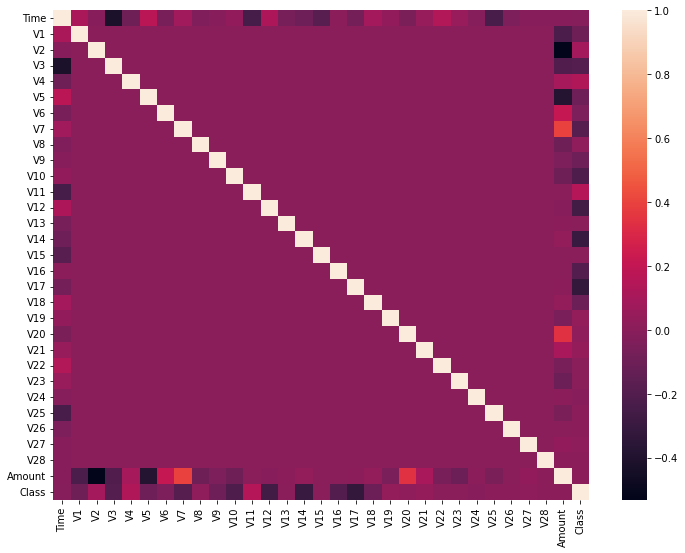

In [49]:
corrmat=credit_card.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat)
plt.show()

* In the heatmap we can see that the most of the features do not coorelate to other features.
* But V2 , V5 are negatively coorelated with feature amount.
* There is also coorelation between V20 and amount

In [17]:
#compare the values for both transactions
credit_card.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under-sampling

In [18]:
#Build a sample data set containing similar distribution of normal trasactions and fraudulent transactions.
#So we are going to take 492 normal trasactions and 492 fraud transactions

In [19]:
legit_sample=legit.sample(n=492)

In [20]:
#concatenating two dataframes

In [21]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)
# we are writing axis=0 so that data frames will add one by one (rowwise) if we write axis=1 then values will be adding column wise

In [22]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
239937,150349.0,1.968653,0.436568,-0.986252,3.663795,0.853531,0.713580,0.066941,0.031380,-0.595312,...,0.022280,0.208267,0.023083,0.027017,0.250617,0.107185,-0.032867,-0.050714,9.07,0
26127,33921.0,1.353991,-1.254846,0.872532,-1.544068,-1.505596,0.314215,-1.455943,0.153199,-1.909854,...,-0.068065,0.170071,0.027402,-0.293989,0.131619,-0.210648,0.075192,0.025323,47.50,0
234613,148047.0,2.028685,0.224580,-2.551702,0.402302,0.905105,-1.076018,0.654887,-0.331324,-0.156304,...,0.090078,0.352363,-0.043347,0.736527,0.351725,0.655745,-0.111035,-0.055465,25.43,0
29856,35662.0,-2.284800,-2.312388,-0.321312,-0.106096,2.542346,2.971186,-1.594334,1.502940,-1.684966,...,0.149978,-0.373471,0.270242,0.966015,-0.234960,-0.297275,0.082615,-0.236344,156.00,0
132363,79960.0,1.315817,0.398781,-0.023038,0.489689,0.114072,-0.579292,0.132288,-0.204131,-0.048958,...,-0.332058,-0.908015,0.014001,-0.483247,0.358744,0.143966,-0.018072,0.024163,1.79,0


In [23]:
credit_card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94705.217480,-0.084890,0.061509,0.037424,-0.010580,0.087492,0.009965,-0.072272,0.036521,-0.049666,...,0.014007,-0.025072,0.013097,-0.013572,0.043257,-0.006158,0.002659,0.024120,-0.000169,74.759248
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [25]:
#as mean is same as avove dataset credit_card , that means nature of datasets has not changed so difference is still there.That means we got a good sample

# Splitting the data into features & target

In [26]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [27]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
239937  150349.0  1.968653  0.436568 -0.986252  3.663795  0.853531  0.713580   
26127    33921.0  1.353991 -1.254846  0.872532 -1.544068 -1.505596  0.314215   
234613  148047.0  2.028685  0.224580 -2.551702  0.402302  0.905105 -1.076018   
29856    35662.0 -2.284800 -2.312388 -0.321312 -0.106096  2.542346  2.971186   
132363   79960.0  1.315817  0.398781 -0.023038  0.489689  0.114072 -0.579292   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [28]:
print(Y)

239937    0
26127     0
234613    0
29856     0
132363    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the data into training and testing data

In [29]:
X_train, X_test , Y_train ,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape)

(984, 30)


In [30]:
print(X_train.shape,X_test.shape)

(787, 30) (197, 30)


# Model training 

# Logistic Regression

In [31]:
#training the logistic regression model with training data

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [34]:
#Accuracy Score

In [35]:
#accuracy on training data

In [36]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [37]:
print(classification_report(Y_train,X_train_prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       393
           1       0.97      0.92      0.95       394

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [38]:
print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.9479034307496823
